<a href="https://colab.research.google.com/github/jessika2018/Market-Basket-Analysis/blob/main/25-jun-Item_description_ashrafieh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mlxtend --upgrade

     |████████████████████████████████| 1.4MB 5.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import mlxtend
print(mlxtend.__version__)

0.18.0


In [125]:
!pip install Orange3

     |████████████████████████████████| 25.3MB 118kB/s 
     |████████████████████████████████| 491kB 44.1MB/s 
     |████████████████████████████████| 2.3MB 16.9MB/s 
     |████████████████████████████████| 8.3MB 18.7MB/s 
     |████████████████████████████████| 153kB 41.3MB/s 
     |████████████████████████████████| 256kB 40.8MB/s 
     |████████████████████████████████| 942kB 31.0MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 235kB 38.5MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 317kB 39.7MB/s 
     |████████████████████████████████| 59.9MB 46kB/s 
     |████████████████████████████████| 67.5MB 41kB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 3.2MB 21.2MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
  Crea

In [128]:
!pip3 install Orange3-Associate

     |████████████████████████████████| 266kB 5.1MB/s 


In [3]:
# pip install squarify

In [129]:
#Data manipulation libraries
import pandas as pd
import numpy as np
#for market basket analysis (using apriori)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

#for preprocessing
from mlxtend.preprocessing import TransactionEncoder

#visualisation 

import matplotlib.pyplot as plt
import Orange
from Orange.data import Domain, DiscreteVariable, ContinuousVariable
from orangecontrib.associate.fpgrowth import *

%matplotlib inline
#to print all the interactive output without resorting to print, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [74]:
df = pd.read_excel("/content/Saida_Category.xlsx")
# df

In [75]:
df.head()
# test_df=pd.DataFrame(data=df, columns=['Item_Description'])


,Category
0,beverages & ready to eat;alcohol
1,frozen
2,beverages & ready to eat;beverages & ready to eat
3,health & beauty;frozen
4,chilled


In [76]:
# intermediate_df = df['Item_Description'].str.split(';', expand=True).stack().str.strip().reset_index(level=1,drop=True)

In [77]:
# intermediate_df

In [78]:
# df
subset_df = df.sample(frac=.5)

In [79]:
# subset_df

In [80]:
# df2 = subset_df.groupby(by=['Group','Receipt_Number']).agg(text=("Item_Description", lambda x: ";".join(set(x))))
# df2
# df2 = subset_df.groupby(by=['Receipt Number']).agg(text=("Item Description", lambda x: ";".join(set(x))))
# df2
# df2=subset_df.groupby("Group").agg({"Item_Description": np.sum, "Receipt_Number": lambda x: x.nunique()})
# df2

In [88]:
# df2
subset_df
# new_df = df2.iloc[:,0]

,Category
235,meal solutions;chilled
495,beverages & ready to eat;beverages & ready to ...
925,meal solutions;meal solutions;meal solutions;m...
125,beverages & ready to eat;beverages & ready to ...
659,beverages & ready to eat
...,...
982,beverages & ready to eat;beverages & ready to ...
811,beverages & ready to eat;beverages & ready to ...
186,frozen;frozen;frozen;frozen
714,cleaning;cleaning;frozen;frozen


In [82]:
# new_df

In [83]:
# df2.Item_Description.nunique()

In [84]:
# df2.text.nunique()

In [85]:
# df["Group"] = df["Group"].str.lower()

In [69]:
# df2["text"] = df2["text"].str.lower()

In [89]:
subset_df["Category"]

235                               meal solutions;chilled
495    beverages & ready to eat;beverages & ready to ...
925    meal solutions;meal solutions;meal solutions;m...
125    beverages & ready to eat;beverages & ready to ...
659                             beverages & ready to eat
                             ...                        
982    beverages & ready to eat;beverages & ready to ...
811    beverages & ready to eat;beverages & ready to ...
186                          frozen;frozen;frozen;frozen
714                      cleaning;cleaning;frozen;frozen
51                              beverages & ready to eat
Name: Category, Length: 500, dtype: object

In [98]:
data = list(subset_df["Category"].apply(lambda x:x.split(';')))
# data 


In [99]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df

,alcohol,baby,beverages & ready to eat,chilled,cleaning,frozen,health & ...,health & beauty,meal solutions,pet,tobacco
0,False,False,False,True,False,False,False,False,True,False,False
1,True,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,True,False,False,False,False,False,False,False,True
496,False,False,True,False,False,False,False,False,False,False,False
497,False,False,False,False,False,True,False,False,False,False,False
498,False,False,False,False,True,True,False,False,False,False,False


# View top sold items 

In [121]:
total_item_count = sum(df.sum())
print(total_item_count)

item_summary_df = df.sum().sort_values(ascending = False).reset_index().head(n=20)
item_summary_df.rename(columns={item_summary_df.columns[0]:'item_name',item_summary_df.columns[1]:'item_count'}, inplace=True)
item_summary_df.head()

1014


,item_name,item_count
0,beverages & ready to eat,345
1,meal solutions,159
2,chilled,148
3,health & beauty,87
4,alcohol,74


# Visualize top sold items|

<BarContainer object of 11 artists>

([<matplotlib.axis.XTick at 0x7f3a6896e910>,
 [Text(0, 0, 'beverages & ready to eat'),
  Text(0, 0, 'meal solutions'),
  Text(0, 0, 'chilled'),
  Text(0, 0, 'health & beauty'),
  Text(0, 0, 'alcohol'),
  Text(0, 0, 'frozen'),
  Text(0, 0, 'cleaning'),
  Text(0, 0, 'tobacco'),
  Text(0, 0, 'baby'),
  Text(0, 0, 'pet'),
  Text(0, 0, 'health & ...')])

Text(0, 0.5, 'Item count')

Text(0.5, 1.0, 'Item sales distribution')

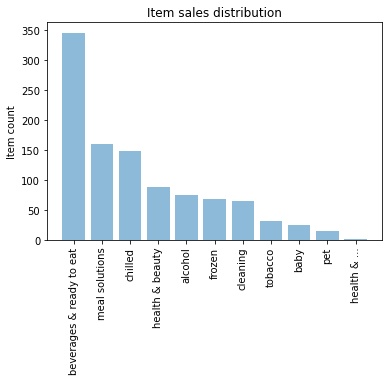

In [130]:
objects = (list(item_summary_df['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary_df['item_count'].head(n=20))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')


# Analyse items contributing to top sales


In [131]:

item_summary_df['item_perc'] = item_summary_df['item_count']/total_item_count
item_summary_df['total_perc'] = item_summary_df.item_perc.cumsum()
item_summary_df.head(10)

,item_name,item_count,item_perc,total_perc
0,beverages & ready to eat,345,0.340237,0.340237
1,meal solutions,159,0.156805,0.497041
2,chilled,148,0.145957,0.642998
3,health & beauty,87,0.085799,0.728797
4,alcohol,74,0.072978,0.801775
5,frozen,67,0.066075,0.867850
6,cleaning,64,0.063116,0.930966
7,tobacco,31,0.030572,0.961538
8,baby,24,0.023669,0.985207
9,pet,14,0.013807,0.999014


#Analyze items contributing to top 50% of sales

In [132]:
item_summary_df[item_summary_df.total_perc <= 0.5].shape

(2, 4)

In [133]:
item_summary_df[item_summary_df.total_perc <= 0.5]

,item_name,item_count,item_perc,total_perc
0,beverages & ready to eat,345,0.340237,0.340237
1,meal solutions,159,0.156805,0.497041


# Construct Orange Table

In [139]:
input_assoc_rules = df
domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,X=input_assoc_rules.to_numpy(),Y= None)

In [100]:
df.columns

Index(['alcohol', 'baby', 'beverages & ready to eat', 'chilled', 'cleaning',
       'frozen', 'health & ...', 'health & beauty', 'meal solutions', 'pet',
       'tobacco'],
      dtype='object')

# Prune Dataset for frequently purchased items

In [142]:
def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5, start_item = None, end_item = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'}, inplace=True)
    if not start_item and not end_item: 
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]

In [150]:
output_df, item_counts = prune_dataset(input_df=df, length_trans=1,total_sales_perc=0.4)
print(output_df.shape)
print(list(output_df.columns))

(345, 1)
['beverages & ready to eat']


# **Association Rule Mining with FP Growth**

In [162]:
# #Visualizations
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("dark")
# import squarify
# import matplotlib


In [163]:
# ##Lets consider the top 20 items purchased freequently
# r=df.sum(axis=0).sort_values(ascending=False)[:20]
# #altering the figsize
# plt.figure(figsize=(20,10))
# s=sns.barplot(x=r.index,y=r.values)
# s.set_xticklabels(s.get_xticklabels(), rotation=90)

In [164]:
# # create a color palette, mapped to these values
# my_values=r.values
# cmap = matplotlib.cm.Blues
# mini=min(my_values)
# maxi=max(my_values)
# norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
# colors = [cmap(norm(value)) for value in my_values]


# #treemap of top 20 frequent items
# plt.figure(figsize=(10,10))
# squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
# plt.title("Tree map of top 20 items")
# plt.axis('off')

In [165]:
frequent_itemsets = apriori(df,min_support=0.002,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.148,(alcohol)
1,0.048,(baby)
2,0.69,(beverages & ready to eat)
3,0.296,(chilled)
4,0.128,(cleaning)
...,...,...
942,0.004,"(health & beauty, beverages & ready to eat, cl..."
943,0.004,"(health & beauty, beverages & ready to eat, cl..."
944,0.002,"(health & beauty, beverages & ready to eat, cl..."
945,0.002,"(health & beauty, beverages & ready to eat, cl..."


In [170]:
res=association_rules(frequent_itemsets,metric="lift",min_threshold = 1.3)
res

TypeError: ignored

In [106]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
frequent_itemsets

,support,itemsets,length
0,0.148,(alcohol),1
1,0.048,(baby),1
2,0.690,(beverages & ready to eat),1
3,0.296,(chilled),1
4,0.128,(cleaning),1
...,...,...,...
470,0.004,"(health & beauty, beverages & ready to eat, cl...",7
471,0.004,"(health & beauty, beverages & ready to eat, cl...",7
472,0.002,"(health & beauty, beverages & ready to eat, cl...",7
473,0.002,"(health & beauty, beverages & ready to eat, cl...",8


In [117]:
frequent_itemsets[ (frequent_itemsets['length'] == 8) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length


In [108]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.148,(alcohol),1
1,0.048,(baby),1
2,0.690,(beverages & ready to eat),1
3,0.296,(chilled),1
4,0.128,(cleaning),1
5,0.134,(frozen),1
7,0.174,(health & beauty),1
8,0.318,(meal solutions),1
9,0.028,(pet),1
10,0.062,(tobacco),1


In [109]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

In [110]:
frequent_itemset_fp_growth=fpgrowth(df,min_support=0.22,use_colnames=True)
frequent_itemset_fp_growth = frequent_itemset_fp_growth.sort_values(by="support",ascending=False)
frequent_itemset_fp_growth

,support,itemsets
2,0.690,(beverages & ready to eat)
0,0.318,(meal solutions)
1,0.296,(chilled)


In [111]:
res=association_rules(frequent_itemset_fp_growth,metric="lift",min_threshold=1)
res = res.sort_values(by="lift",ascending=False)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [112]:
frequent_itemsets.sort_values(by="support",ascending=False)

,support,itemsets,length
2,0.690,(beverages & ready to eat),1
8,0.318,(meal solutions),1
3,0.296,(chilled),1
32,0.206,"(beverages & ready to eat, meal solutions)",2
27,0.184,"(chilled, beverages & ready to eat)",2
...,...,...,...
311,0.002,"(beverages & ready to eat, cleaning, alcohol, ...",5
312,0.002,"(beverages & ready to eat, cleaning, alcohol, ...",5
315,0.002,"(health & beauty, beverages & ready to eat, cl...",5
317,0.002,"(beverages & ready to eat, cleaning, meal solu...",5


## **View Top sold items**